**Status**: Still needs work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Train.csv')
df = data.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Separating object and numeric columns

In [6]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

* Outlet and item identifier is useless. It's just unique ID's.

In [7]:
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')

In [8]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
for col in cat_cols:
    print('\n')
    display(df.loc[:, col].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

* Item fat content column has categories that can be merged.

In [10]:
# df.loc[:, cat_cols] = df.loc[:, cat_cols].astype('category')

In [11]:
# df.dtypes

## Filling out missing values in item_weights

In [12]:
df.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [13]:
item_weight_median = df.pivot_table(index = 'Item_Identifier', values = 'Item_Weight', aggfunc = 'median')
item_weight_median

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Replace the NaN values in Item_Weight column with its mean in the Item_Identifier column

In [14]:
for i in list(df.loc[df['Item_Weight'].isnull() == True].index):
    identifier = df.loc[i, 'Item_Identifier']
    try:
        df.loc[i, 'Item_Weight'] = int(item_weight_median.loc[identifier])
    except:
        df.loc[i, 'Item_Weight'] = int(df.loc[:, 'Item_Weight'].mean())

In [15]:
df.Item_Weight.isnull().sum()

0

## Outlet Size and Outlet Type

In [16]:
df.loc[:, ['Outlet_Size', 'Outlet_Type']].nunique()

Outlet_Size    3
Outlet_Type    4
dtype: int64

In [17]:
df.loc[:, ['Outlet_Size', 'Outlet_Type']].isnull().sum()

Outlet_Size    2410
Outlet_Type       0
dtype: int64

The null values on the Outlet Size column will be replaced by the mode of their respective outlet size. 

In [18]:
df.loc[:, 'Outlet_Size'].unique(), df.loc[:, 'Outlet_Type'].unique()

(array(['Medium', nan, 'High', 'Small'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object))

In [19]:
outlet_size_pivot = df.pivot_table(index = 'Outlet_Type', 
                                  aggfunc = (lambda x: x.mode()[0]),
                                  values = 'Outlet_Size')
outlet_size_pivot

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


1. Find rows that have missing values
2. For each row i
    1. Find its corresponding outlet type and assign it to outlet_type variable
    2. Find the value of index: outlet_type from the pivot table
    3. Replace the value at i<sup>th</sup> index with the Mode value from pivot table

In [20]:
for row in list(df.loc[df['Outlet_Size'].isnull() == True].index):
    identifier = df.loc[row, 'Outlet_Type']
    df.loc[row, 'Outlet_Size'] = str(outlet_size_pivot.loc[identifier].values[0])

In [21]:
df.Outlet_Size.isnull().sum()

0

## Item invisibility column

In [22]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
df.Item_Visibility.isnull().sum()

0

In [24]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

We will replace the 0's with median of the column

In [25]:
median_item_visibility = df.loc[df['Item_Visibility'] != 0].loc[:, 'Item_Visibility'].median()
median_item_visibility

0.057792343

In [26]:
df.loc[:, 'Item_Visibility'].replace(0, median_item_visibility, inplace = True)

In [27]:
df.Item_Visibility.min()

0.003574698

## Item Fat Content column

In [28]:
df.loc[:, 'Item_Fat_Content'].nunique()

5

In [29]:
df.loc[:, 'Item_Fat_Content'] = df.loc[:, 'Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                       'reg':'Regular',
                                                                       'low fat':'Low Fat'})
df.loc[:, 'Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Adding new features

## New item column 
Only captures the type of food(drinks/consumable/non-consumable)

In [30]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [32]:
df['New_Item_Type'] = df.loc[:, 'Item_Identifier'].apply(lambda x: x[:2])
df.loc[:, 'New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [33]:
df.loc[:, 'New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [34]:
df.loc[:, 'New_Item_Type'] = df.loc[:, 'New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df.loc[:, 'New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

## Change in non-consumable item types in Item_Fat_Content 
Replacing those values with 'non-edible'

In [35]:
df.loc[df.loc[:, 'New_Item_Type']=='Non-Consumable', 'Item_Fat_Content']

4       Low Fat
16      Low Fat
22      Low Fat
25      Low Fat
31      Low Fat
         ...   
8500    Low Fat
8502    Low Fat
8504    Low Fat
8516    Low Fat
8520    Low Fat
Name: Item_Fat_Content, Length: 1599, dtype: object

In [36]:
df.loc[df.loc[:, 'New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

df.loc[:, 'Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

## Age of outlet
How many years has it been since the outlet is present

In [37]:
df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non-Edible,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


# EDA

## Exploring the numeric columns

In [39]:
data.dtypes[data.dtypes == np.number]

Item_Weight          float64
Item_Visibility      float64
Item_MRP             float64
Item_Outlet_Sales    float64
dtype: object

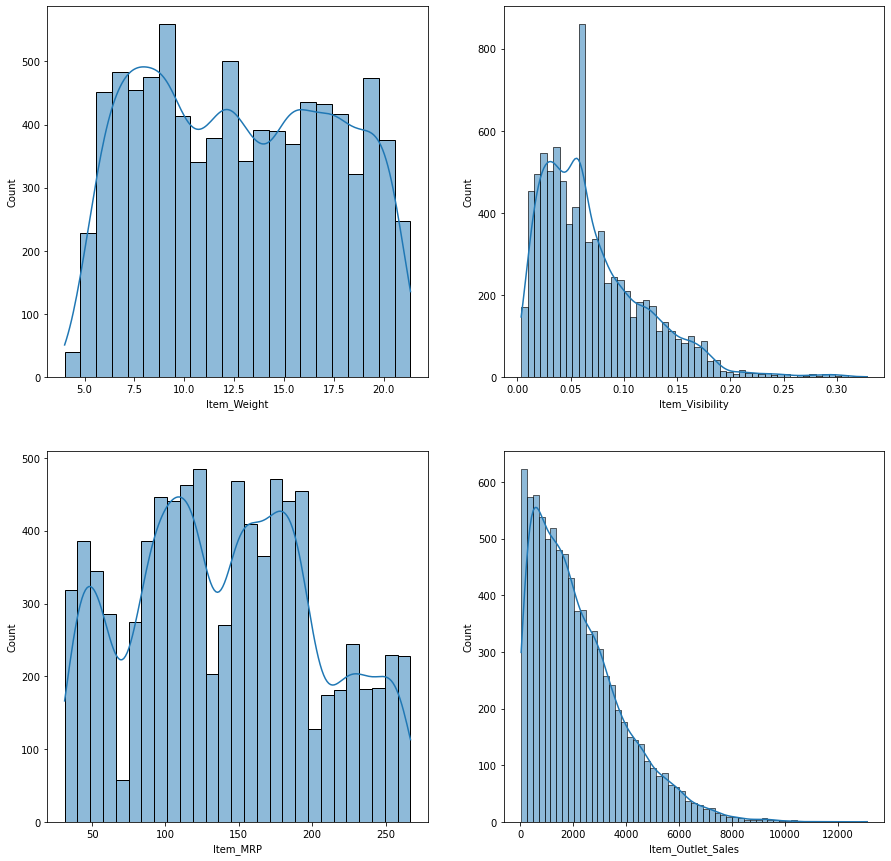

In [40]:
fig, ax = plt.subplots(ncols = 2,
                       nrows= 2,
                       figsize = (15,15))

sns.histplot(df.loc[:, 'Item_Weight'], ax = ax[0][0], kde = True)
sns.histplot(df.loc[:, 'Item_Visibility'], ax = ax[0][1], kde = True)
sns.histplot(df.loc[:, 'Item_MRP'], ax = ax[1][0], kde = True)
sns.histplot(df.loc[:, 'Item_Outlet_Sales'], ax = ax[1][1], kde = True)

fig.subplots_adjust(hspace = 0.2,wspace = 0.2)
plt.show()

The distribution of Item_Outlet_Sales which is our target column seems to be right skewed.

We will normalize this distribution later on before training.

## Making countplots of output related categorical variables
Also a countplot of the years variable

In [41]:
list(data.dtypes[data.dtypes == 'object'].index)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [42]:
list(data.dtypes[data.dtypes == 'object'].index[4:]) + ['Outlet_Establishment_Year']

['Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

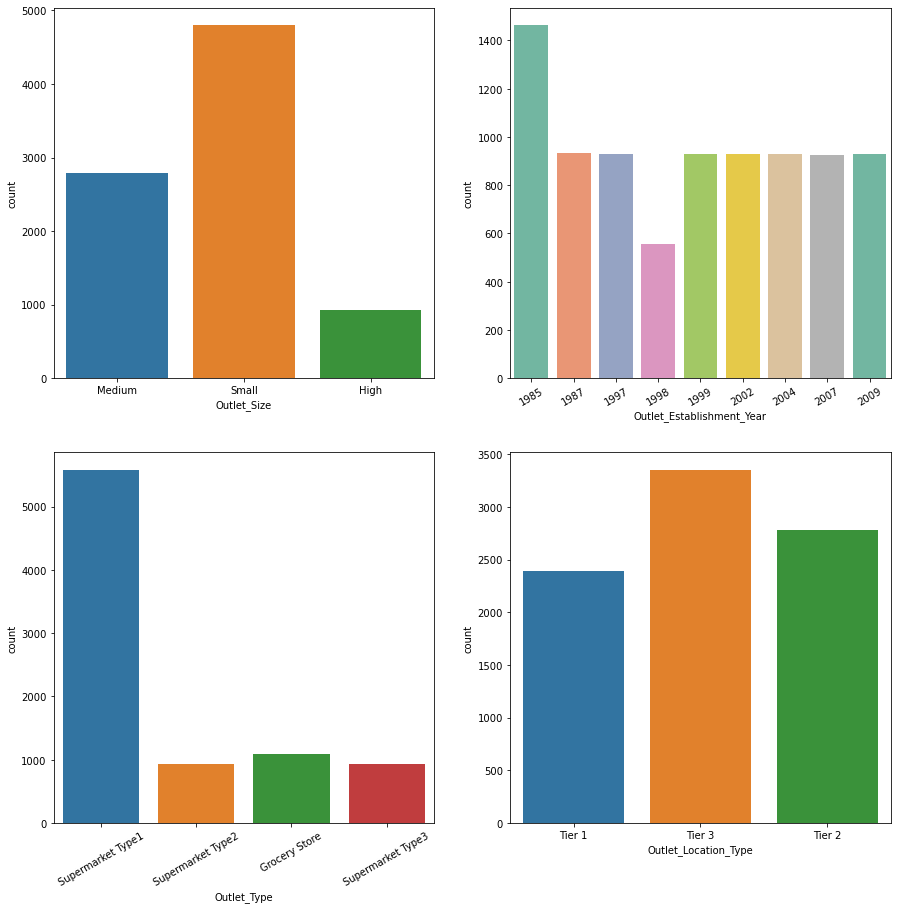

In [43]:
fig, ax = plt.subplots(2,2, figsize = (15,15))

sns.countplot(x = df.loc[:, 'Outlet_Size'], ax = ax[0][0])

sns.countplot(x = df.loc[:, 'Outlet_Establishment_Year'], ax = ax[0][1], palette = "Set2")
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(),rotation = 30)

sns.countplot(x = df.loc[:, 'Outlet_Type'], ax = ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation = 30)

sns.countplot(x = df.loc[:, 'Outlet_Location_Type'], ax = ax[1][1])

fig.subplots_adjust(hspace = 0.2,wspace = 0.2)
plt.show()

### Spectating Item_Fat_Content and Item_Type variables
These are also categorical variables. 

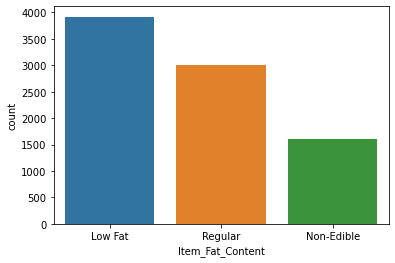

In [44]:
sns.countplot(x = df.loc[:, "Item_Fat_Content"]);

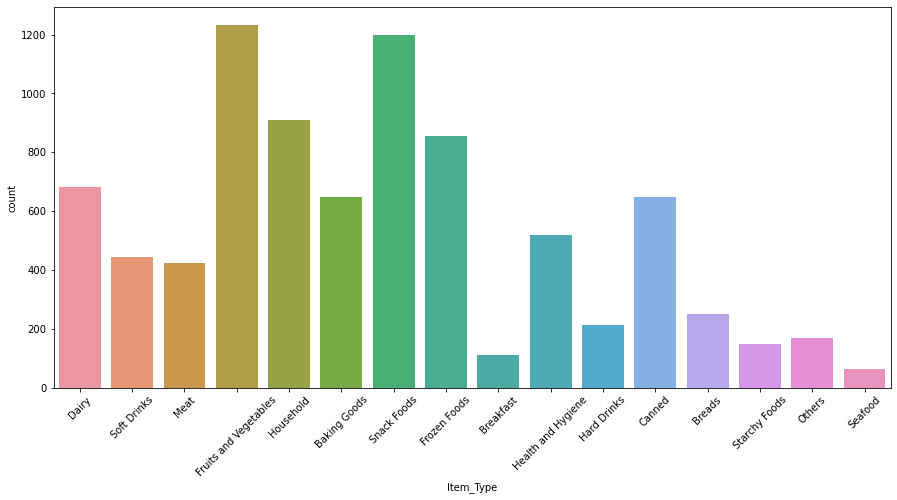

In [45]:
fig, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x = df.loc[:, "Item_Type"])
plt.xticks(rotation = 45)
plt.show();

### Correlation Matrix

In [46]:
corr_mat = df.corr().apply(abs).replace(1.0,0)
corr_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,0.000000,0.020052,0.026517,0.012513,0.010240,0.012513
Item_Visibility,0.020052,0.000000,0.004763,0.078328,0.134161,0.078328
Item_MRP,0.026517,0.004763,0.000000,0.005020,0.567574,0.005020
Outlet_Establishment_Year,0.012513,0.078328,0.005020,0.000000,0.049135,1.000000
Item_Outlet_Sales,0.010240,0.134161,0.567574,0.049135,0.000000,0.049135
Outlet_Years,0.012513,0.078328,0.005020,1.000000,0.049135,0.000000


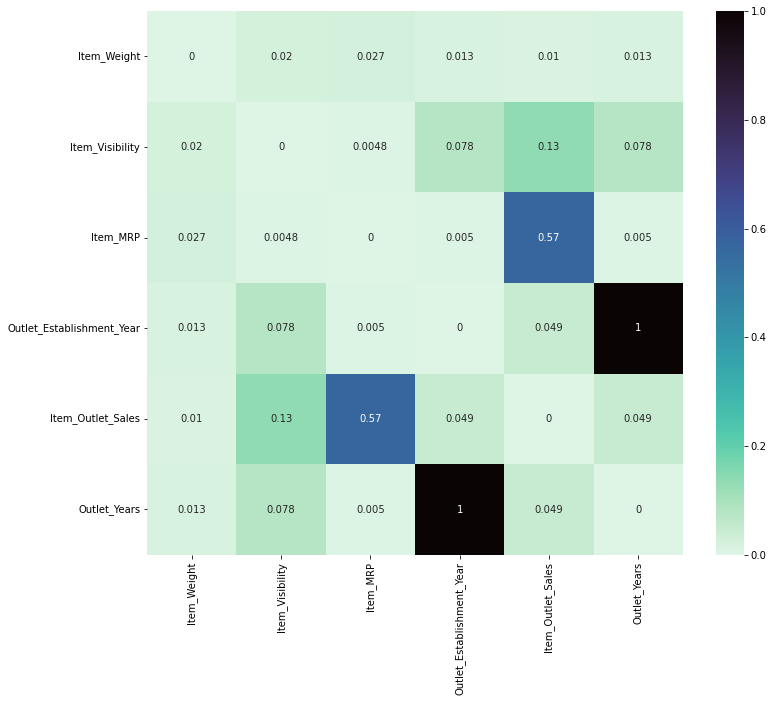

In [47]:
fig, ax = plt.subplots(figsize = (12,10))

ax = sns.heatmap(corr_mat,
                cmap = 'mako_r',
                annot = True)

Looking at variables that are most correlated with the label (Item_Outlet_Sales)

In [48]:
corr_mat.Item_Outlet_Sales.sort_values(ascending = False)

Item_MRP                     0.567574
Item_Visibility              0.134161
Outlet_Years                 0.049135
Outlet_Establishment_Year    0.049135
Item_Weight                  0.010240
Item_Outlet_Sales            0.000000
Name: Item_Outlet_Sales, dtype: float64

# Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## One-hot encoding

In [51]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,23,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,13,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,23,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057792,6,182.0950,OUT010,1998,732.3800,24,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.057792,9,53.8614,OUT013,1987,994.7052,35,1,...,0,0,1,0,1,0,0,0,0,1


# Creating X and y variables

In [52]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Normalizing Label

In [53]:
from scipy.stats.mstats import normaltest

In [54]:
normaltest(df.loc[:, 'Item_Outlet_Sales'])

NormaltestResult(statistic=1591.7919099869514, pvalue=0.0)

If pvalue was greater than 0.5, it could be considered normal. But this is heavily skewed.

Item Outlet Sales column, which is also our label is right skewed. We will normalize this distribution

In [55]:
from scipy.stats import boxcox

In [56]:
y_norm,y_lam = boxcox(y)

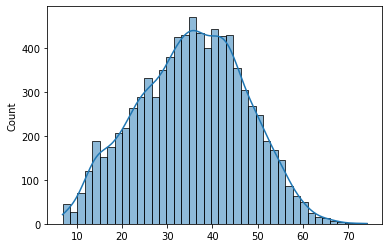

In [57]:
sns.histplot(y_norm, kde = True);

In [58]:
normaltest(y_norm)

NormaltestResult(statistic=207.8732183960798, pvalue=7.25945734144925e-46)

The distribution is far more normal than it was before. We also used the numeric metric to confirm

# Creating train test splits

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2)

# Scaling some columns

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.796782,0.069699,7.226681,140.992782,24.168133,4.722281,0.459697,0.187610,0.352693,0.109351,...,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703,0.093746,0.718644,0.187610
std,4.652612,0.048826,4.209990,62.275067,8.371760,2.837201,0.498402,0.390423,0.477836,0.312098,...,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538,0.291493,0.449687,0.390423
min,4.000000,0.003575,0.000000,31.290000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.710000,0.033085,4.000000,93.826500,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.057792,6.000000,143.012800,23.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.850000,0.094585,10.000000,185.643700,35.000000,7.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.328391,15.000000,266.888400,37.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
X.dtypes

Item_Weight               float64
Item_Visibility           float64
Item_Type                   int64
Item_MRP                  float64
Outlet_Years                int64
Outlet                      int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
New_Item_Type_0             uint8
New_Item_Type_1             uint8
New_Item_Type_2             uint8
dtype: object

In [64]:
X_numeric = df.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Years', 'Outlet']]

In [65]:
X_numeric.describe().loc[['min', 'max']]

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet
min,4.00,0.003575,0.0,31.2900,13.0,0.0
max,21.35,0.328391,15.0,266.8884,37.0,9.0


In [66]:
scaler.fit(X_train)

StandardScaler()

In [67]:
X_train = scaler.transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
X_train

array([[ 1.38534984,  0.48995592, -0.53231033, ..., -0.31823898,
         0.62178602, -0.47937249],
       [-0.31558196, -0.2807439 , -1.72185206, ..., -0.31823898,
         0.62178602, -0.47937249],
       [ 0.52411855, -0.74274123,  0.41932306, ..., -0.31823898,
        -1.60827031,  2.08606049],
       ...,
       [-0.20792805,  2.04183899, -1.00812702, ..., -0.31823898,
         0.62178602, -0.47937249],
       [ 0.19039142,  2.3402426 , -1.00812702, ..., -0.31823898,
         0.62178602, -0.47937249],
       [ 0.48105698,  1.03425924, -1.72185206, ..., -0.31823898,
         0.62178602, -0.47937249]])

# Trying out different learners
We will do hyperparameter tuning on the regressors that perform well here

In [70]:
from sklearn.model_selection import cross_val_score
def train(model, X, y, model_name):
    
    model.fit(X, y)
    pred = model.predict(X)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print(f"CV Score: {cv_score}")
    
    return pd.Series(data=cv_score, index=[model_name])

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [72]:
cv_score_list = []

### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
cv_score_list.append(train(model, X_train, y_train, 'LinearRegression'))

Model Report
CV Score: 44.45975349766602


### Ridge

In [74]:
model = Ridge()
cv_score_list.append(train(model, X_train, y_train, 'Ridge'))

Model Report
CV Score: 44.43324298736316


### Lasso

In [75]:
model = Lasso()
cv_score_list.append(train(model, X_train, y_train, 'Lasso'))

Model Report
CV Score: 47.6991242893388


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Random Forest

In [77]:
model = RandomForestRegressor()
cv_score_list.append(train(model, X_train, y_train, 'RandomForest'))

Model Report
CV Score: 46.98548598932598


### ExtraTreesRegressor

In [78]:
model = ExtraTreesRegressor()
cv_score_list.append(train(model, X_train, y_train, 'ExtraTreesRegressor'))

Model Report
CV Score: 50.41908447982571


### LightBGM

In [79]:
from lightgbm import LGBMRegressor

In [80]:
model = LGBMRegressor()
cv_score_list.append(train(model, X_train, y_train, 'LGBM'))

Model Report
CV Score: 43.97782515185087


### XGBoost

In [81]:
from xgboost import XGBRegressor

In [82]:
model = XGBRegressor()
cv_score_list.append(train(model, X_train, y_train, 'XGB'))

Model Report
CV Score: 48.946292636107664


### Seeing which model performs best 
(without hyperparameter tuning)

In [83]:
pd.concat(cv_score_list, axis = 0).sort_values(ascending = False)

ExtraTreesRegressor    50.419084
XGB                    48.946293
Lasso                  47.699124
RandomForest           46.985486
LinearRegression       44.459753
Ridge                  44.433243
LGBM                   43.977825
dtype: float64

Looks like Extra Trees Regressor, XGB, Lasso and Random Forest performed best here

# Hyperparameter tuning

## XGBoost

In [84]:
from scipy.stats import uniform, randint

In [85]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [86]:
param_grid_xgbr = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'subsample': uniform(0.6, 0.4)}

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
xgbr_cv = RandomizedSearchCV(XGBRegressor(),
                            param_distributions = param_grid_xgbr,
                            n_jobs = -1)

In [89]:
xgbr_model = xgbr_cv.fit(X_train, y_train)

In [90]:
xgbr_pred_test = xgbr_model.predict(X_test)

In [91]:
from scipy.special import inv_boxcox

### Necessary inversions from normalization

In [93]:
xgbr_pred_test_inverted = inv_boxcox(xgbr_pred_test, y_lam)

In [94]:
y_test_inverted = inv_boxcox(y_test, y_lam)

### Evaluation

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
r2_score(y_test_inverted, xgbr_pred_test_inverted)

0.5792154518232244

In [100]:
xgbr_pred_test_inverted

array([3146.988 ,  802.9281, 3408.341 , ..., 1382.0583, 1818.6284,
       3376.8972], dtype=float32)

In [101]:
y_test_inverted

array([5287.7836,  619.194 , 3060.0168, ...,  852.224 , 1127.8652,
       4098.6648])

In [102]:
y_train_inverted = inv_boxcox(y_train, y_lam)

In [103]:
xgbr_pred_train = xgbr_model.predict(X_train)

In [104]:
xgbr_pred_train_inverted = inv_boxcox(xgbr_pred_train, y_lam)

In [106]:
mean_squared_error(y_train_inverted, xgbr_pred_train_inverted)

908202.6828248684

In [109]:
mean_squared_error(y_test_inverted, xgbr_pred_test_inverted)

1308559.0435816566

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
mean_absolute_error(y_test_inverted, xgbr_pred_test_inverted)

786.4858695665323

# Time for some epic gradient boosting vs random forest

In [113]:
RF = RandomForestRegressor(oob_score=True, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = []

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.410385
20.0,0.380695
30.0,0.365299
40.0,0.357869
50.0,0.351571
100.0,0.343887
150.0,0.341343
200.0,0.340428
300.0,0.339120


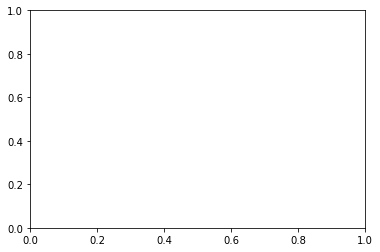

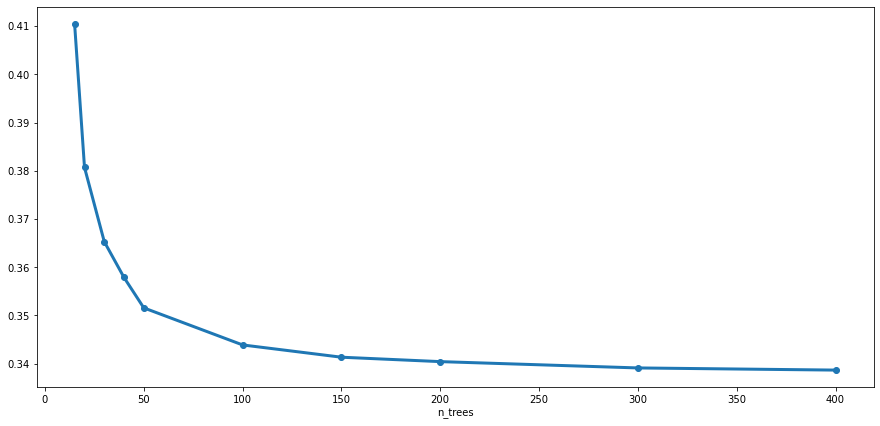

In [114]:
fig, ax = plt.subplots()
ax = rf_oob_df.plot(legend=False,
                    marker='o',
                    figsize=(15, 7),
                    linewidth = 3)

In [115]:
EF = ExtraTreesRegressor(oob_score=True, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.411706
20.0,0.382113
30.0,0.364147
40.0,0.354286
50.0,0.350417
100.0,0.340746
150.0,0.337704
200.0,0.336403
300.0,0.335370


In [116]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.410385,0.411706
20.0,0.380695,0.382113
30.0,0.365299,0.364147
40.0,0.357869,0.354286
50.0,0.351571,0.350417
100.0,0.343887,0.340746
150.0,0.341343,0.337704
200.0,0.340428,0.336403
300.0,0.339120,0.335370


<AxesSubplot:xlabel='n_trees'>

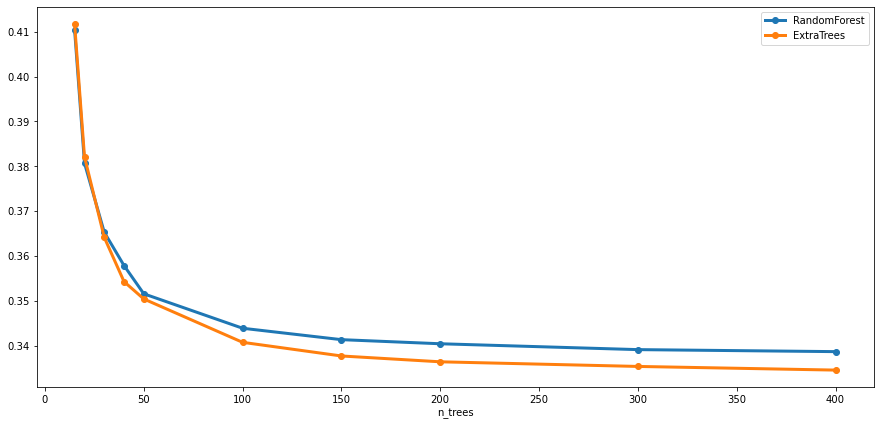

In [117]:
oob_df.plot(figsize = (15,7),
           linewidth = 3,
           legend = True,
           marker = 'o')

Conclusion:

Extra Trees Regressor is working better than random forest. So we use extra trees classiifer

In [118]:
n_trees = [100,150,200,250,300,400]

In [146]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
param_grid_etr = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [120]:
param_grid_etr = {
'n_estimators': n_trees,
'max_samples' : np.linspace(0.0,1.0,10),
'min_samples_split' : np.linspace(0.0,1.0,10),
'min_samples_leaf' : np.linspace(0.0,1.0,10),
}

In [147]:
etr_cv = RandomizedSearchCV(ExtraTreesRegressor(bootstrap = True),
                           param_distributions = param_grid_etc,
                           cv = 5,
                           n_jobs = -1)

In [148]:
etr_model = etr_cv.fit(X_train, y_train)

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/apr

In [149]:
etr_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 0.6666666666666666,
 'min_samples_leaf': 0.3333333333333333,
 'max_samples': 0.7777777777777777}

In [150]:
etr_pred_test = etr_model.predict(X_test)
etr_pred_test_inverted = inv_boxcox(etr_pred_test, y_lam)

In [151]:
r2_score(y_test_inverted, etr_pred_test_inverted)

-0.07485255098321852

In [138]:
mean_absolute_error(y_test_inverted, etr_pred_test_inverted)

1364.9659966755446

In [132]:
mean_squared_error(y_test_inverted, etr_pred_test_inverted)

3342205.652069378

In [143]:
X_train.min()

-1.8873290718529963

In [144]:
r2_score(y_test, etr_pred_test)

-0.00011529842720725547

In [145]:
mean_absolute_error(y_test, etr_pred_test)

9.972239297772987

In [98]:
mean_squared_error(y_test_inverted, xgbr_pred_test_inverted)

1308559.0435816566

Trying out the default Lightbgm for comparison

In [153]:
lgbm_model = LGBMRegressor()
lgbm_model = model.fit(X_train, y_train)

In [156]:
lgbm_pred_test = lgbm_model.predict(X_test)
lgbm_pred_test_inverted = inv_boxcox(lgbm_pred_test, y_lam)

In [157]:
mean_squared_error(y_test_inverted, lgbm_pred_test_inverted)

1435283.680420221

Randomized search on light bgm

In [160]:
from scipy.stats import uniform, randint
params_lgbm = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [161]:
lgbm_cv = RandomizedSearchCV(LGBMRegressor(),
                              param_distributions = params_lgbm,
                              n_jobs = -1)

In [371]:
params_lgbm

{'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f04b09c7160>,
 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f04b0a12df0>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f04b0a2a7f0>,
 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f04b0a0fa90>,
 'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f04b0988520>}

In [374]:
randint(2,6).

3.5

In [162]:
lgbm_model = lgbm_cv.fit(X_train, y_train)
lgbm_pred_test = lgbm_cv.predict(X_test)
lgbm_pred_test_inverted = inv_boxcox(lgbm_pred_test, y_lam)

[LightGBM] [Warning] Unknown parameter: gamma


In [163]:
r2_score(y_test_inverted, lgbm_pred_test_inverted)

0.5933431169092995

In [376]:
mean_squared_error(y_test,lgbm_pred_test)

46.284980415622236

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown param

In [164]:
r2_score(y_test_inverted, xgbr_pred_test_inverted)

0.5792154518232244

In [165]:
mean_absolute_error(y_test_inverted, lgbm_pred_test_inverted)

772.3321384756067

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown param

In [167]:
np.sqrt(mean_absolute_error(y_test_inverted, lgbm_pred_test_inverted))


27.790864298823216

In [171]:
lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_train_inverted = inv_boxcox(lgbm_pred_train, y_lam)

Let's get this straight

For XGBoost:

In [168]:
r2_score(y_test_inverted, xgbr_pred_test_inverted)

0.5792154518232244

In [170]:
r2_score(y_train_inverted, xgbr_pred_train_inverted)

0.6826603760231873

For Light BGM:

In [169]:
r2_score(y_test_inverted, lgbm_pred_test_inverted)

0.5933431169092995

In [172]:
r2_score(y_train_inverted, lgbm_pred_train_inverted)

0.6116123190019196

### I'm leaving this project for now. I'll get back to it later.